In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
OUT_FILE_LOC = 'examples/bangor_2015_multilayer/outputs/bangor_2015_hb_ww/bangor_wheat_single_layer/latest/bangor_wheat_single_layer-bangor_2015_hb_ww_out.csv'
nL = 1
nP = 3

In [24]:
OUT_FILE_LOC = 'examples/bangor_2015_multilayer/outputs/bangor_2015_hb_ww/bangor_wheat/latest/bangor_wheat-bangor_2015_hb_ww_out.csv'
nL = 3
nP = 3

In [25]:
df = pd.read_csv(OUT_FILE_LOC)
df.head()

,Unnamed: 0,dd,ts_c,par,td,lai,sai,dvi,photoperiod,PARsun,...,leaf_pop_distribution_1_1,leaf_pop_distribution_1_2,leaf_pop_distribution_2_0,leaf_pop_distribution_2_1,leaf_pop_distribution_2_2,leaf_pop_distribution_3_0,leaf_pop_distribution_3_1,leaf_pop_distribution_3_2,growing_populations,layer_lai
0,0,71,5.36,0.0,0.0,0.0,5.657143,-1.0,12.701909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[False, False, False]","[0.0, 0.0, 0.0, 0.0]"
1,1,71,5.85,0.0,0.0,0.0,5.657143,-1.0,12.701909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[False, False, False]","[0.0, 0.0, 0.0, 0.0]"
2,2,71,5.88,0.0,0.0,0.0,5.657143,-1.0,12.701909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[False, False, False]","[0.0, 0.0, 0.0, 0.0]"
3,3,71,5.19,0.0,0.0,0.0,5.657143,-1.0,12.701909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[False, False, False]","[0.0, 0.0, 0.0, 0.0]"
4,4,71,5.90,0.0,0.0,0.0,5.657143,-1.0,12.701909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[False, False, False]","[0.0, 0.0, 0.0, 0.0]"


In [26]:
df.columns

Index(['Unnamed: 0', 'dd', 'ts_c', 'par', 'td', 'lai', 'sai', 'dvi',
       'photoperiod', 'PARsun',
       ...
       'leaf_pop_distribution_1_1', 'leaf_pop_distribution_1_2',
       'leaf_pop_distribution_2_0', 'leaf_pop_distribution_2_1',
       'leaf_pop_distribution_2_2', 'leaf_pop_distribution_3_0',
       'leaf_pop_distribution_3_1', 'leaf_pop_distribution_3_2',
       'growing_populations', 'layer_lai'],
      dtype='object', length=101)

In [27]:
# # split leaf_pop_distribution column into multi d array
# import re
# r_pattern = "\[" + "\n ".join(["\[" + " +?".join(["([\d\.e+-]+?)" for _ in range(nP)]) + " *?\]" for _ in range(nL)]) + "\]"

# def split_leaf_lai(r):
#     try:
#         return np.array(re.search(r_pattern, r).groups()).reshape((nL,nP)).astype(float)
#     except ValueError as e:
#         print("Row failed value")
#         print(r)
#         raise e
#     except AttributeError as e:
#         print("row failed (Could not find regex groups)")
#         print(r)
#         raise e
        

# print(df['leaf_pop_distribution'].iloc[1000])
# out = split_leaf_lai(df['leaf_pop_distribution'].iloc[1000])
# print(out.shape)
# print(out)

# leaf_pops_lai = np.array([split_leaf_lai(i) for i in df['leaf_pop_distribution']])
# leaf_pops_lai.shape, leaf_pops_lai[0]

In [28]:
leaf_pops_lai = np.array([[df[f'leaf_pop_distribution_{iL}_{iP}'] for iP in range(nP)] for iL in range(nL)])
leaf_pops_lai.shape

(3, 3, 3672)

In [29]:
bool('False')

True

In [30]:
# split growing_populations column into multi d array
import re
r_pattern = "\[(?:(\w*), *?)(?:(\w*), *?) (\w*)\]"
print(r_pattern)
print(df['growing_populations'].iloc[1000])
print(re.search(r_pattern, df['growing_populations'].iloc[1000]).groups())
def split_leaf_lai(r):
    try:
        return np.array([1 if g == "True" else 0 for g in re.search(r_pattern, r).groups()])
    except ValueError as e:
        print("Row failed value")
        print(r)
        raise e
    except AttributeError as e:
        print("row failed (Could not find regex groups)")
        print(r)
        raise e
        

print(df['growing_populations'].iloc[1000])
out = split_leaf_lai(df['growing_populations'].iloc[1000])
print(out.shape)
print(out)

# leaf_pops_lai = np.array([split_leaf_lai(i) for i in df['growing_populations']])
growing_populations = pd.DataFrame([split_leaf_lai(i) for i in df['growing_populations']])

growing_populations.head()

\[(?:(\w*), *?)(?:(\w*), *?) (\w*)\]
[True, False, False]
('True', 'False', 'False')
[True, False, False]
(3,)
[1 0 0]


,0,1,2
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


# Analyse emergence
Leaf population start of emergenece is dstributed between the plant emergence and the flag leaf emergence.
td_dd for each population is the thermal time since that population emerged.
Populations continue to grow while their td_dd is between 0 and t_lem.
We currently set t_lem either by the phyllochron at plant emergence or as a constant in the config.
Plant leaf carbon is distributed between all the leaf populations that are currently emerging/growing.

<AxesSubplot:>

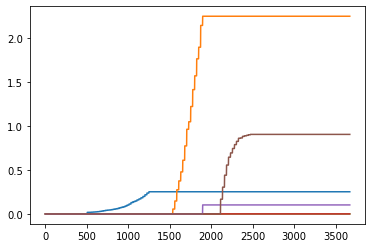

In [32]:
df[f'leaf_pop_distribution_0_0'].plot()
df[f'leaf_pop_distribution_0_1'].plot()
df[f'leaf_pop_distribution_0_2'].plot()
df[f'leaf_pop_distribution_1_0'].plot()
df[f'leaf_pop_distribution_1_1'].plot()
df[f'leaf_pop_distribution_1_2'].plot()

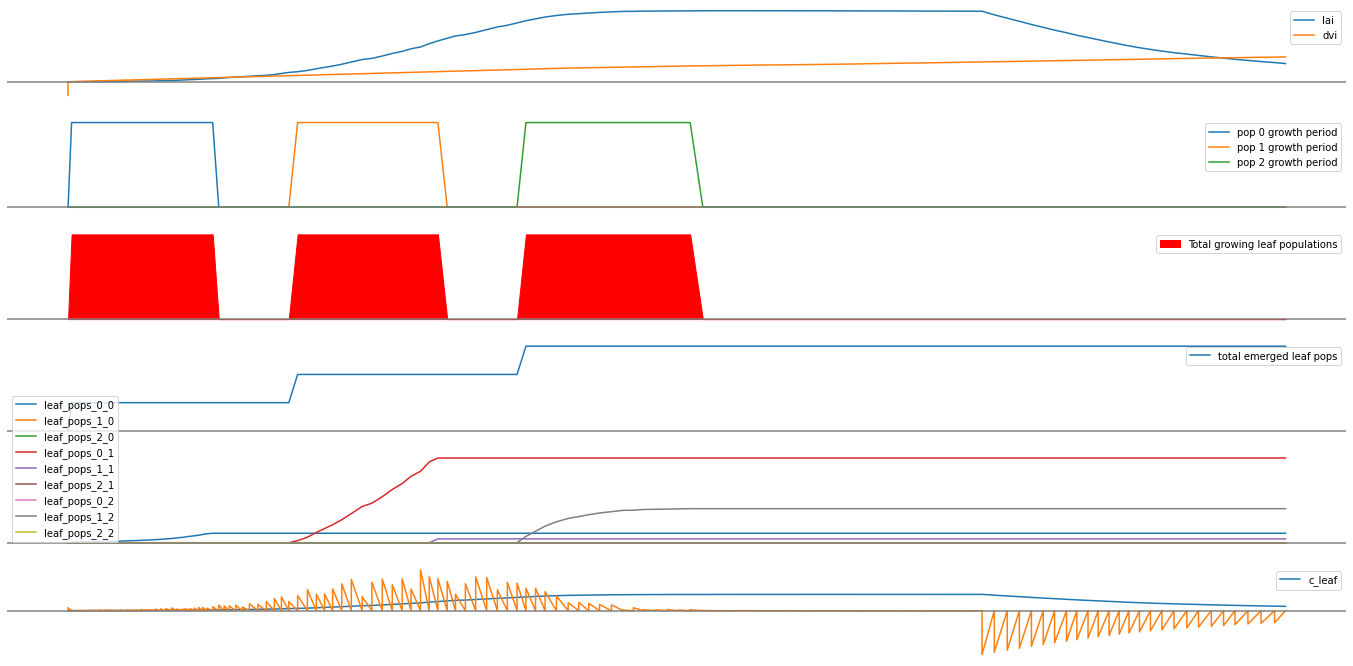

In [33]:
nrows = 6
fig, axs = plt.subplots(nrows=nrows, figsize=(24,nrows*2))
td = df['td_dd'].values
axs[0].plot(td, df['lai'], label="lai")
axs[0].plot(td, df['dvi'], label="dvi")

axs[1].plot(td, growing_populations.values[:,0], label="pop 0 growth period")
axs[1].plot(td, growing_populations.values[:,1], label="pop 1 growth period")
axs[1].plot(td, growing_populations.values[:,2], label="pop 2 growth period")

# axs[2].plot(td, growing_populations.sum(axis=1), label='Total growing leaf populations', color="red")
axs[2].fill_between(td, growing_populations.sum(axis=1), 0, label='Total growing leaf populations', color="red")

axs[3].plot(td, df['total_emerged_leaves'], label="total emerged leaf pops")

[
axs[4].plot(td, leaf_pops_lai[iL,iP,:], label=f"leaf_pops_{iL}_{iP}")
for iP in range(nP)
for iL in range(nL)
]

axs[5].plot(td, df['c_leaf'], label="c_leaf")
lai_diff = [b - a for a, b in zip(df['lai'], df['lai'][1:])]
axs[5].plot(td[0:-1], lai_diff)

[ax.legend() for ax in axs]
[ax.axis('off') for ax in axs]
[ax.axhline(0, c="grey") for ax in axs]
plt.show()

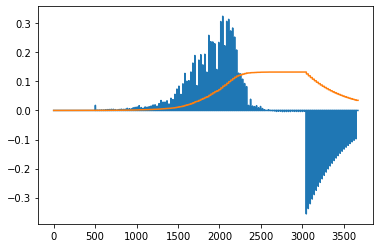

In [12]:
# Positive lai diff is distributed between growing leaf populations
lai_diff = [b - a for a, b in zip(df['lai'], df['lai'][1:])]
plt.plot(lai_diff)
plt.plot(df['c_leaf'])

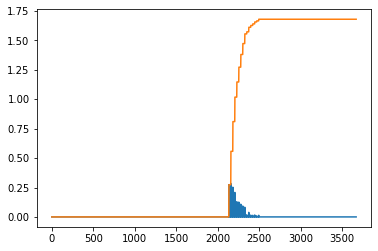

In [13]:
# Flag leaf lai diff
lai_diff = [b - a if g and b>a else 0 for a, b, g in zip(df['lai'], df['lai'][1:],growing_populations.values[:,-1])]
plt.plot(lai_diff)
from itertools import accumulate
plt.plot(list(accumulate(lai_diff)))
# plt.plot(df['c_leaf'])

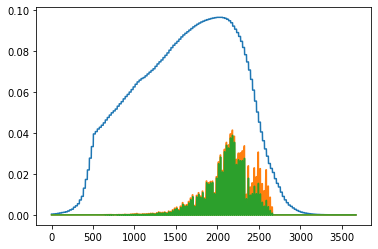

In [14]:
from pyDO3SE.plugins.carbon_allocation.calculations import calc_partition_coefficients
dvi = df['dvi']
p_leaf = np.array([calc_partition_coefficients(
    i, 
        a_root= 18.5, # Param
        a_stem= 16.0, # Param
        a_leaf= 18.0, # Param
        b_root= -20.0, # Param
        b_leaf= -15.0, # Param
        b_stem= -18.5, # Param
).p_leaf for i in dvi])
plt.plot(p_leaf/10)
npp_acc = df['npp_acc']
plt.plot(npp_acc)
c_leaf_diff = [0 if i%24 != 23 else p*n for i, (p, n, d) in enumerate(zip(p_leaf, npp_acc, dvi))]
plt.plot(c_leaf_diff)


In [15]:
c_leaf_diff[24*100:24*102], 2423%24

([0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.010386277090576183,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.014032727822886013],
 23)

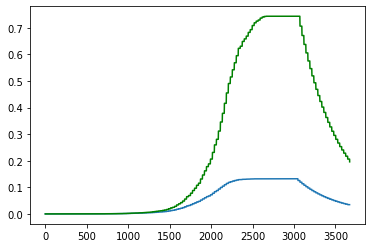

In [16]:
from functools import reduce
leaf_f_phen = df['leaf_f_phen']
# flag_c_leaf = list(accumulate([c * f if d < 1.5 else (c*f)-1.05*c for d, c, f in zip(df['dvi'], c_leaf_diff, leaf_f_phen)]))
c_leaf_calced = [0]
for i, (d, c) in enumerate(zip(df['dvi'], c_leaf_diff)):
    c_leaf_row = c_leaf_calced[-1] if i % 24 != 23 else \
        c_leaf_calced[-1] + c if d < 1.5 else \
            0.95 * (c_leaf_calced[-1] + c)
    c_leaf_calced.append(c_leaf_row)
# c_leaf_calced = list(reduce(lambda acc, v: acc + [acc[-1] + v[1]] if v[0] < 1.5 else acc + [(acc[-1] + v[1])*0.95], zip(df['dvi'], c_leaf_diff, leaf_f_phen), [0]))
# flag_c_leaf = list(reduce(lambda acc, v: acc + [acc[-1] + v[1] * v[2]] if v[0] < 1.5 else acc + [(acc[-1] + v[1]+v[2])*0.95], zip(df['dvi'], c_leaf_diff, leaf_f_phen), [0]))
# plt.plot(flag_c_leaf, c="red")
plt.plot(df['c_leaf'])
plt.plot(c_leaf_calced, c="green")

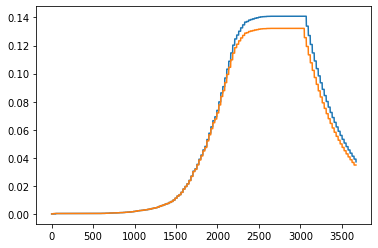

In [17]:
from pyDO3SE.plugins.carbon_allocation.calculations import daily_carbon_allocation
c_leaf = [0]
npp_calced = [0]
for i, (d, npp) in enumerate(zip(df['dvi'], df['npp_acc'])):
    if i%24 == 23:
        c_leaf_i = daily_carbon_allocation(
                npp, d, 0,0,c_leaf[-1], 0,0,
                a_root= 18.5,
                a_stem= 16.0,
                a_leaf= 18.0,
                b_root= -20.0,
                b_stem= -15.0,
                b_leaf= -18.5,
                theta=0.4,
            ).c_leaf
        c_leaf.append(c_leaf_i)
        npp_calced.append(npp)
    else:
        c_leaf.append(c_leaf[-1])
        npp_calced.append(npp_calced[-1])
plt.plot(c_leaf)
plt.plot(df['c_leaf'])
# plt.plot(npp_calced)
# plt.plot(df['npp_acc'].iloc[2000:2100])

In [18]:
from pyDO3SE.plugins.carbon_allocation.calculations import calc_LAI_from_DVI_and_carbon
flag_lai = [calc_LAI_from_DVI_and_carbon(d, c, gamma=27.3,delta=-0.0507, emerged_leaf_count=3) for d, c in zip(dvi, flag_c_leaf)]

# flag_lai = list(accumulate([b - a if g and b>a else 0 for a, b, g in zip(df['lai'], df['lai'][1:],growing_populations.values[:,-1])]))
plt.plot(lai_diff)
from itertools import accumulate
plt.plot(list(accumulate(lai_diff)))

plt.plot(flag_lai)

NameError: name 'flag_c_leaf' is not defined

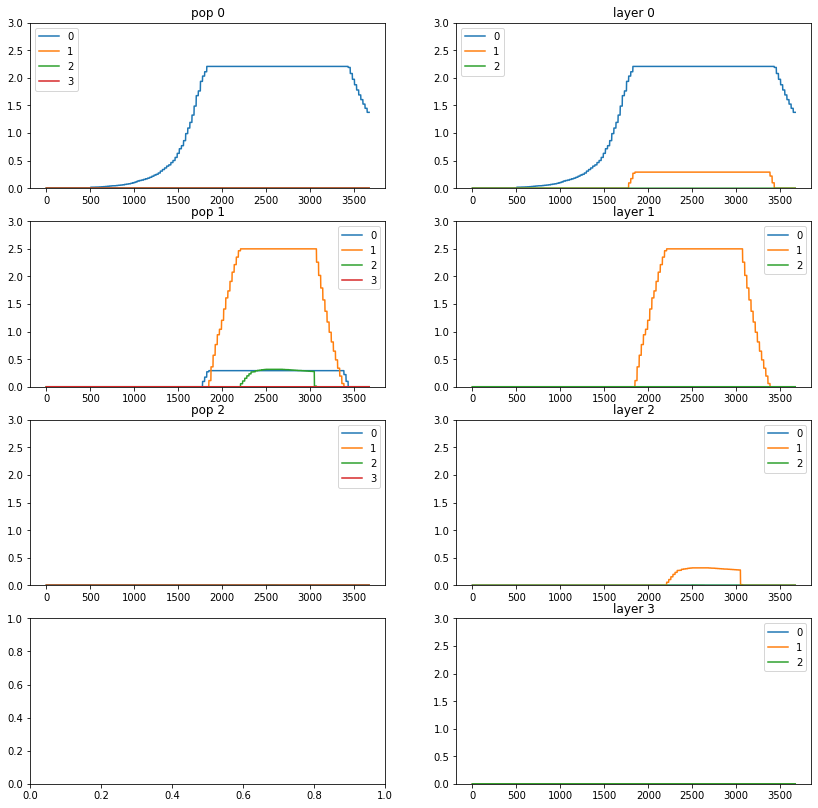

In [ ]:
# plot leaf pops lai
#(row, layer, pop)
nP = 3
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(14,14))
for iP in range(nP):
    axs[iP][0].set_title(f"pop {iP}")
    axs[iP][0].plot(leaf_pops_lai[:,0,iP], label="0")
    axs[iP][0].plot(leaf_pops_lai[:,1,iP], label="1")
    axs[iP][0].plot(leaf_pops_lai[:,2,iP], label="2")
    axs[iP][0].plot(leaf_pops_lai[:,3,iP], label="3")
    axs[iP][0].legend()
    axs[iP][0].set_ylim(0,3)

for iL in range(nL):
    axs[iL][1].set_title(f"layer {iL}")
    axs[iL][1].plot(leaf_pops_lai[:,iL,0], label="0")
    axs[iL][1].plot(leaf_pops_lai[:,iL,1], label="1")
    axs[iL][1].plot(leaf_pops_lai[:,iL,2], label="2")
    axs[iL][1].legend()
    axs[iL][1].set_ylim(0,3)



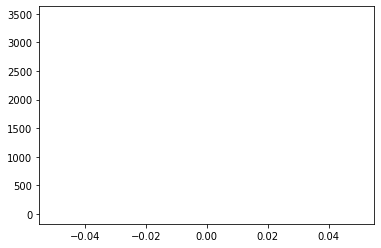

In [19]:
plt.title ="Leaf pops over layers"
for iL in range(nL):
    a = np.sum(np.sum(leaf_pops_lai[:,0:iL,:],axis=1), axis=1)
    b = np.sum(leaf_pops_lai[:,iL,:],axis=1)
    x = np.arange(len(a))
    plt.fill_between(x, a, a + b)
for iP in range(nP):
    a = np.sum(np.sum(leaf_pops_lai[:,:,0:iP],axis=1), axis=1)
    b = np.sum(leaf_pops_lai[:,:,iP],axis=1)
    plt.plot(a + b, label=iP, c="red")
plt.show()

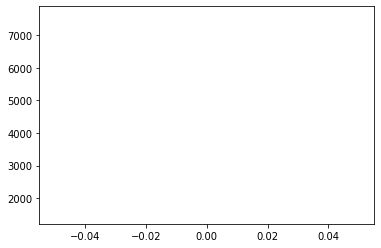

In [20]:
# layer
a = np.sum(leaf_pops_lai[:,:,:],axis=2)
plt.plot(a)

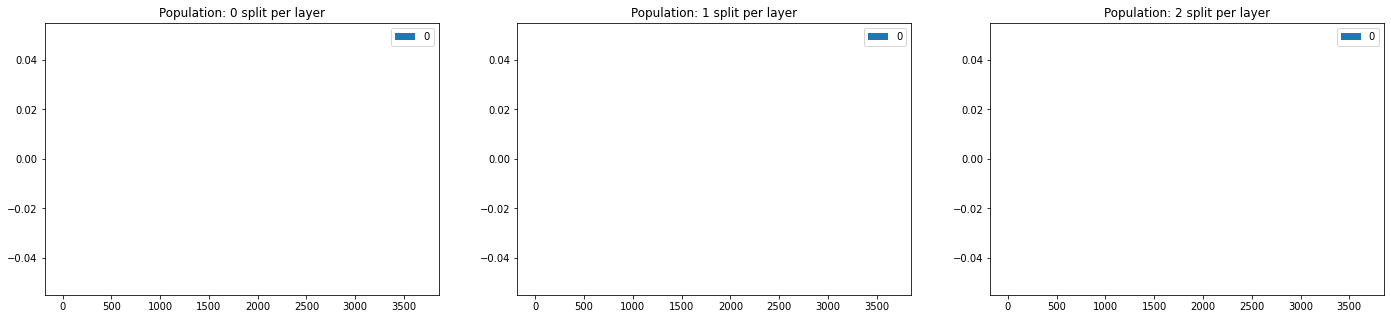

In [21]:
fig, axs = plt.subplots(ncols=nP, nrows=1, figsize=(24,5))

x = np.arange(len(df))

for iP in range(nP):
    for iL in range(nL):
        a = np.sum(leaf_pops_lai[:,0:iL,iP], axis=1)
        b = leaf_pops_lai[:,iL,iP]
        axs[iP].set_title(f"Population: {iP} split per layer")
        axs[iP].fill_between(x, a, a + b, label=iL)
        axs[iP].legend()

IndexError: index 3 is out of bounds for axis 1 with size 3

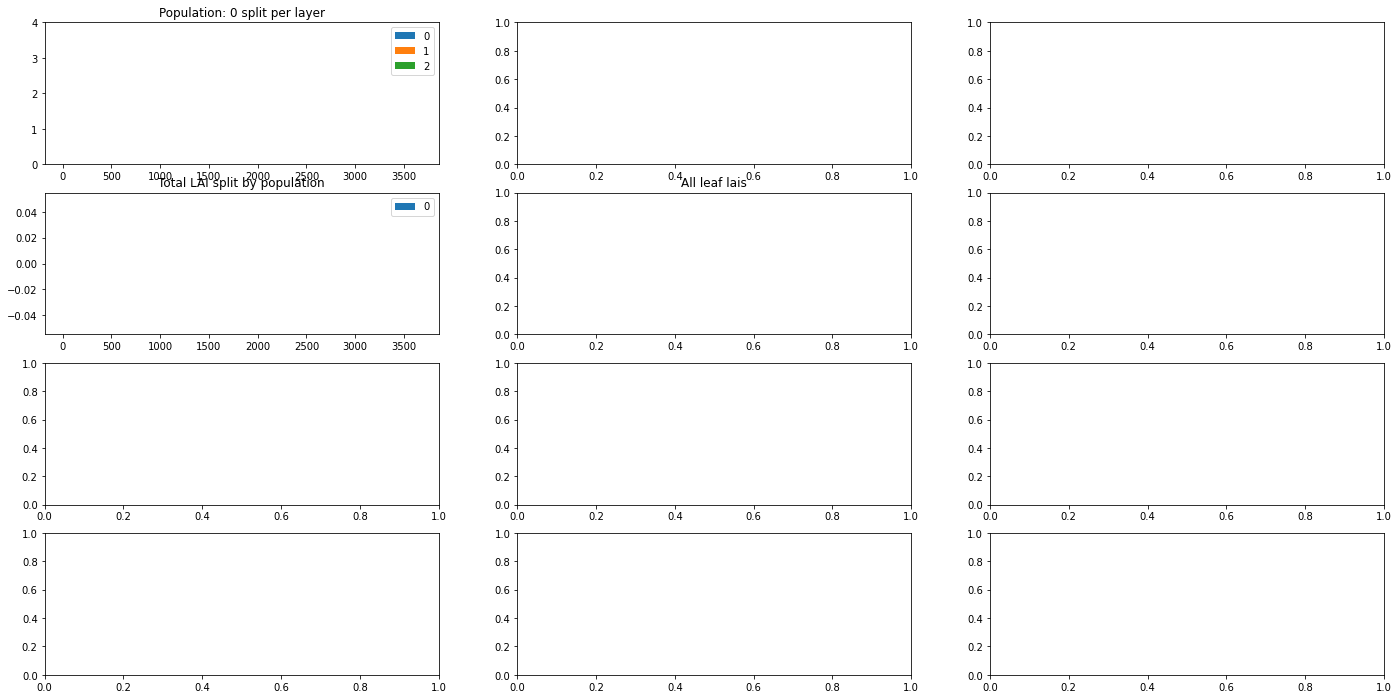

In [22]:
fig, axs = plt.subplots(ncols=max(nP, nL), nrows=4, figsize=(24,12))
nP = 3
nL = 4
x = np.arange(len(df))

axs[1][1].set_title("All leaf lais")

for iP in range(nP):
    a = np.sum(np.sum(leaf_pops_lai[:,:,0:iP],axis=2), axis=1)
    b = np.sum(leaf_pops_lai[:,:,iP],axis=1)
    axs[1][0].fill_between(x, a, a + b, label=iP)
    axs[1][0].legend()
    axs[1][0].set_title("Total LAI split by population")
    for iL in range(nL):
        a = np.sum(leaf_pops_lai[:,0:iL,iP], axis=1)
        b = leaf_pops_lai[:,iL,iP]
        axs[0][iP].set_title(f"Population: {iP} split per layer")
        axs[0][iP].fill_between(x, a, a + b, label=iL)
        axs[0][iP].legend()
        axs[0][iP].set_ylim(0,4)
axs[1][1].legend()



for iL in range(nL):
    for iP in range(nP):
        a = np.sum(leaf_pops_lai[:,iL,0:iP], axis=1)
        b = leaf_pops_lai[:,iL,iP]
        axs[3][iL].set_title(f"layer: {iL} split per pop")
        axs[3][iL].fill_between(x, a, a + b, label=iL)
        axs[3][iL].legend()

# axs[2][0].plot(c_leaf_per_pop_list)
# axs[2][0].plot(leaf_carbon)
# axs[2][0].set_title("leaf_carbon")

# for i, iP in enumerate(range(nP)):
#     a = np.array([sum(a[0:iP]) for a in growing_tracker])
#     b = np.array([a[iP] for a in growing_tracker])
#     x = np.arange(len(a))
#     axs[2][1].fill_between(x, i, i + b, label=iP)
#     axs[2][1].legend()

for iL in range(nL):
    a = np.sum(np.sum(leaf_pops_lai[:,0:iL,:],axis=1), axis=1)
    b = np.sum(leaf_pops_lai[:,iL,:],axis=1)
    x = np.arange(len(a))
    axs[2][2].fill_between(x, a, a + b)
for iP in range(nP):
    a = np.sum(np.sum(leaf_pops_lai[:,:,0:iP],axis=1), axis=1)
    b = np.sum(leaf_pops_lai[:,:,iP],axis=1)
    x = np.arange(len(a))
    axs[2][2].plot(a + b, label=iP, c="red")

# axs[2][2].set_title("Leaf pops over layers")
# for iL in range(nL):
#     a = np.sum(np.sum(leaf_pops_lai[:,0:iL,:],axis=1), axis=1)
#     b = np.sum(leaf_pops_lai[:,iL,:],axis=1)
#     x = np.arange(len(a))
#     axs[2][2].fill_between(x, a, a + b)
# for iP in range(nP):
#     a = np.sum(np.sum(leaf_pops_lai[:,:,0:iP],axis=1), axis=1)
#     b = np.sum(leaf_pops_lai[:,:,iP],axis=1)
#     axs[2][2].plot(a + b, label=iP, c="red")

# axs[2][3].set_title("emerged leaf count")
# axs[2][3].plot(emerged_leaf_count)

# axs[1][2].set_title("Lai")
axs[1][2].plot(df['lai'])
